In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Ch. 3 Vectors, Part 2

## Vector Sets

A vector *set* is a collection of vectors that can contain a finite or an infinite number of vectors (or no vectors at all).
Noted as $V = \{\vec{v}_1, ... , \vec{v{_n}}\}$

## Linear Weighted Combinations

A *linear weighted combination* is is scalar-vector multiplication and addition. Take some set of vectors, multiply each vector by a scalar, and then take the sum to produce a single vector (evidenced below).
$$ \vec{w} = \lambda_1\vec{v_1} + \lambda_2\vec{v_2},...,\lambda_n\vec{v_n} $$
All vectors $\vec{v}$ are assumed to have some dimensionality and all scalars $\lambda$ can be any real number.
The following mathematical example demonstrates linear weighted combination.
$$ \lambda_1 = 1,\ \lambda_2 = 2,\ \lambda_3 = -3 $$
$$\vec{v_1} = \begin{bmatrix} 4 \\ 5 \\ 1 \end{bmatrix}\ \vec{v_2} = \begin{bmatrix} -4 \\ 0 \\ -4 \end{bmatrix}\ \vec{v_3} = \begin{bmatrix} 1 \\ 3 \\ 2 \end{bmatrix}$$

$$ \begin{align}
\vec{w} &= \lambda_1\vec{v_1} + \lambda_2\vec{v_2} + \lambda_3\vec{v}_3 \\
\vec{w} &= 1\begin{bmatrix} 4 \\ 5 \\ 1 \end{bmatrix} + 2\begin{bmatrix} -4 \\ 0 \\ -4 \end{bmatrix} -3 \begin{bmatrix} 1 \\ 3 \\ 2 \end{bmatrix} \\
\vec{w} &= \begin{bmatrix} 4 \\ 5 \\ 1 \end{bmatrix} + \begin{bmatrix} -8 \\ 0 \\ -8 \end{bmatrix} + \begin{bmatrix} -3 \\ -9 \\ -6 \end{bmatrix} \\
\vec{w} &= \begin{bmatrix} 4 - 8 - 3 \\ 5 + 0 -9 \\ 1 - 8 - 6 \end{bmatrix} \\
\vec{w} &= \begin{bmatrix} -7 \\ -4 \\ -13 \end{bmatrix}
\end{align}
$$

In [9]:
# the above linear combination example in code:
# the scalars
l1 = 1
l2 = 2
l3 = -3

# the vectors
v1 = np.array([4,5,1])
v2 = np.array([-4,0,-4])
v3 = np.array([1,3,2])

# linear weighted combination
l1*v1 + l2*v2 + l3*v3

array([ -7,  -4, -13])

### Some example applications of linear weighted combinations
* the predicted data from a statistical model are created by taking the linear weighted comination of regressors (predictor variables) and coefficients (scalars) that are computed using the least squares algorithm. This will become up in Ch. 11 and 12.
* In dimension-reduction procedures such as PCA, each component is derived as a linear weighted combiantion of the data channels, with the weights selected to maximize the variance of the component (along with other constraints that will be discussed in Ch. 15).
* Artificial neural entworks involve two operations: linear weighted combination of input data followed by nonlinear transformations. The weights are learned by minimizing a cost function, which is typically the difference between the model prediction and the real world target variable.  
  
The concept of linear weighted combinations is the mechanism of creating vector subspaces and matrix spaces, and is central to linear independence.

## Linear Independence
A set of vectors is said to be *linearly **dependent*** if at least one vector in the set can be expressed as a linear weighted combination of other vectrs in that set. Therefore, a set of vectors is *linearly **independent*** if no vector in a set can be expressed as a linear combination of any other vector in the set. For example, 
$$V = \biggl\{\begin{bmatrix} 1 \\ 3 \end{bmatrix},\ \begin{bmatrix} 2 \\ 7 \end{bmatrix}\biggl\}$$
$$S = \biggl\{\begin{bmatrix} 1 \\ 3 \end{bmatrix},\ \begin{bmatrix} 2 \\ 6 \end{bmatrix}\biggl\}$$
  
$V$ is linearly independent since there is no scalar by which you can multiply $\vec{v_1}$ and get $\vec{v_2}$.  
On the other hand, $S$ is linearly dependent, since if you multiply $\vec{s_1}$ by the scalar 2, you get $\vec{s_2}$:
$$\begin{bmatrix} 1 \\ 3 \end{bmatrix} * 2 = \begin{bmatrix} 2 \\ 6 \end{bmatrix} $$

Consider the vector set $T$:
$$T = \Biggl\{\begin{bmatrix} 8 \\ -4 \\ 14 \\ 0 \end{bmatrix},\ \begin{bmatrix} 4 \\ 6 \\ 0 \\ 3 \end{bmatrix},\ \begin{bmatrix} 14 \\ 2 \\ 4 \\ 7 \end{bmatrix},\ \begin{bmatrix} 13 \\ 2 \\ 9 \\ 8 \end{bmatrix}\Biggl\}$$
Is $T$ linearly independent or linearly dependent?

While it may not be immediately obvious, it turns out that $\vec{t_1} + \vec{t_2} + \vec{t_3} = 2\vec{t_4}$:
$$\begin{bmatrix} 8 \\ -4 \\ 14 \\ 0 \end{bmatrix} + \begin{bmatrix} 4 \\ 6 \\ 0 \\ 3 \end{bmatrix} + \begin{bmatrix} 14 \\ 2 \\ 4 \\ 7 \end{bmatrix} = \begin{bmatrix} 26 \\ 4 \\ 18 \\ 16 \end{bmatrix} = 2 * \begin{bmatrix} 13 \\ 2 \\ 9 \\ 8 \end{bmatrix}

This example shows that in practice, it is rare to be able to simply look at set of vectors and easily determine whether or not they are independent (especially when vectors themselves and vectors get very large as often happens with real world data). In practice, to determine linear independence, you create a matrix from the vector set, compute the rank of the matrix, and compare the rank to the smaller of the number of rows or columns. That sentence will make more sense later on.

### A More Formal Definition of Linear Dependence
$$ 0 = \lambda_1\vec{v_1} + \lambda_2\vec{v_2} + ... + \lambda_n\vec{v_n},\ \ \lambda\in \mathbb{R}$$

This equation says that linear dependence means that we can define some linear weighted combination of vectors in the set to produce the zeros vector. But, if you look carefully, you notice a problem: if you set all $\lambda$ values to be 0, then any set of vectors is linearly dependent! This solution is called the *trivial solution*. Therefore, we add a constraint to our definition of linear dependence that says that at least one lambda must not equal zero:
$$ 0 = \lambda_1\vec{v_1} + \lambda_2\vec{v_2} + ... + \lambda_n\vec{v_n},\ \ \lambda_i\in \mathbb{R},\ \exists\lambda_i \neq 0 $$

### Independence and the Zeros Vector
Any vector set that includes the zeros vector is automatically a linearly dependent set because any scalar multple of the zeros vector is still the zeros vector, so the definition of linear independence is always satisfied. In other words, you could set all lambdas except the one multiplied by the zeros vector to be 0, and then pick any number and multiply it by the zeros vector. Adding all of this up produces the zeros vector and, since you had a nonzero number multiplied by the zeros vector, there exists at least one nonzero lambda. Therefore the set is linearly dependent.

## Subspace and Span
A *vector subspace* is the infinite number of ways to linearly combine some finite set of vectors. In other words, while the above exampels of linear combinations used specific numbers for each $\lambda$, in reality there are an infinite number of $\lambda$ values we could use. Taking all of those values together for a given set of vectors creates that vector's *subspace*. The *span* of this set of fectors is the infinity of vectors that can be created as linear combinations of vectors in a set. This probably best understood with an example. Let's start small with the vector set $V = \biggl\{\begin{bmatrix} 1 \\ 3 \end{bmatrix} \biggl\}$. The span of this vector set is represented graphically below. Since this vector set only has 1 vector shown in pnik, the span of $V$ is all the possible linear combinations of that vector, shown in black.

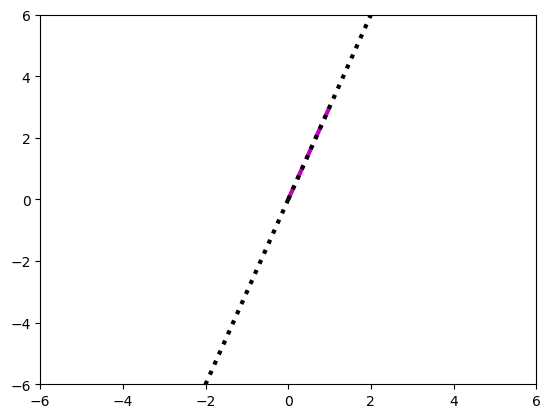

In [25]:
v = np.array([1,3])
s = 2
s2 = -12
# plot
plt.plot([0,v[0]],[0,v[1]],'m--',linewidth=3,label='b')
plt.plot([0,s*v[0]],[0,s*v[1]],'k:',linewidth=3,label='sb')
plt.plot([0,s2*v[0]],[0,s2*v[1]],'k:',linewidth=3,label='sb')

#plt.grid()
#plt.axis('square')
plt.axis([-6,6,-6,6])
#lt.legend()
plt.show()

Let's use a slightly larger example.
$$V = \Biggl\{\begin{bmatrix} 1 \\ 0 \\ 2 \end{bmatrix}, \ \begin{bmatrix} -1 \\ 1 \\ 2 \end{bmatrix} \Biggl\}$$

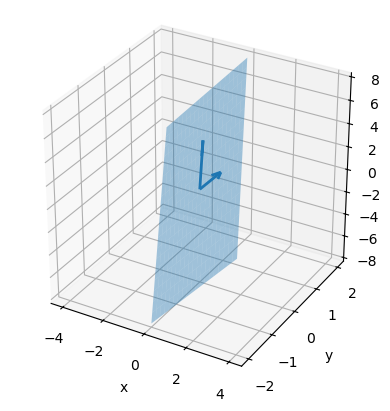

In [34]:
v1 = np.array([1, 0, 2])
v2 = np.array([-1, 1, 2])

a = np.linspace(-2, 2, 20)
b = np.linspace(-2, 2, 20)
A, B = np.meshgrid(a, b)

X = A * v1[0] + B * v2[0]
Y = A * v1[1] + B * v2[1]
Z = A * v1[2] + B * v2[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plane
ax.plot_surface(X, Y, Z, alpha=0.4)

# vectors
ax.quiver(0, 0, 0, *v1, linewidth=2)
ax.quiver(0, 0, 0, *v2, linewidth=2)

# formatting
ax.set_box_aspect([1, 1, 1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

The two vectors are plotted with arrows in 3d space, and the subspace they span is a 2d plane within 3d space.